## QFT

1. 每条线路开始都是H门创建叠加态
2. 每条线路的ROT(Z)的门数量递减，且旋转角度不同，参见视频
3. 最终的可视化就是所有的比特从+态开始，绕着Z轴旋转

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from numpy import pi

例子：假设一个算子P的相位是1/3，用3个量子比特和一个特征向量比特(已知是1态)来估计：
(验证测量得到的结果态代表的二进制数与2的m次*相位非常接近)

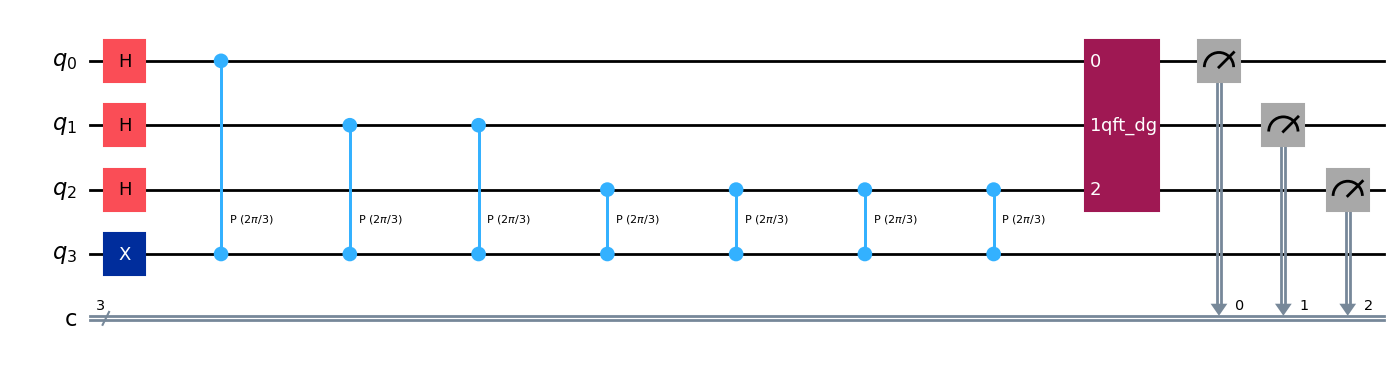

In [2]:
from qiskit.circuit.library import QFTGate
qc = QuantumCircuit(4,3)

for q in range(3):
    qc.h(q)

qc.x(3)

angle = 2 * pi / 3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qc.cp(angle, counting_qubit, 3)
    repetitions *= 2
 
# Do the inverse QFT:
qc.append(QFTGate(3).inverse(), [0, 1, 2])
 
for n in range(3):
    qc.measure(n, n)
 
qc.draw(output="mpl")

True
DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=3>))


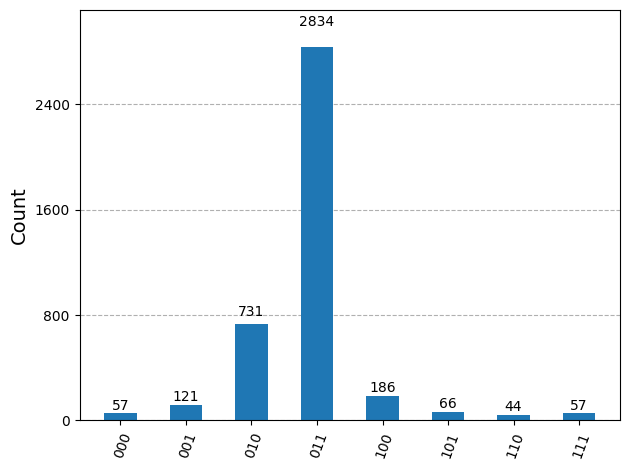

In [9]:
from qiskit.primitives import DataBin
aer_sim = AerSimulator()
shots = 4096

pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
t_qpe = pm.run(qc)

sampler = Sampler(mode=aer_sim)
job = sampler.run([t_qpe], shots=shots)
result = job.result()
answer = result[0].data.c.get_counts()
print(isinstance(result[0].data, DataBin))
print(result[0].data)
plot_histogram(answer)

可以看到最终态是011，代表3，与1/3*2的3次非常接近